In [7]:
import sqlite3 
import pandas as pd
conn = sqlite3.connect('Northwind_small.sqlite')
c = conn.cursor()

In [382]:
# discount for products grouped by 1 of 8 categories
# c.execute("""SELECT productname, categoryId, discount
#              FROM orderdetail
#              JOIN product
#              ON orderdetail.productId = product.Id
#              WHERE categoryId = 1
#              ORDER BY productname ASC
#              ;""")

# price multiplied by quanity for each order, with average discount
# c.execute("""SELECT orderid, SUM(unitprice * quantity) AS total, AVG(discount) AS Avg_Disc
#              FROM orderdetail
#              GROUP BY orderid
#              ;""")

# This created 336,000 rows and discounts were all 0%
# c.execute("""SELECT *
#              FROM 'order'
#              JOIN orderdetail
#              WHERE employeeId = 4
#              ;""")

# Average discount per employee, all within 5-6% range
# c.execute("""SELECT orderid, unitPrice,quantity, AVG(discount),employeeid
#              FROM orderdetail
#              JOIN 'order' as o
#              ON orderdetail.orderid = o.id
#              WHERE employeeID=9
#              ;""")

# goods sold for 1 employee for by orderid
# c.execute("""SELECT orderid, SUM(unitPrice * quantity) AS Goods_sold, employeeId
#              FROM orderdetail
#              JOIN 'order' as o
#              ON orderdetail.orderid = o.id
#              WHERE employeeID=9
#              GROUP BY orderid
#              ;""")

# total sales (count and cost) for each 9 employees
# c.execute("""SELECT count(orderid) AS count,SUM(unitPrice * quantity) AS Goods_sold,employeeId
#              FROM orderdetail
#              JOIN 'order' as o
#              ON orderdetail.orderid = o.id
#              WHERE employeeID=9
#              ;""")

# names, id, country and title of 9 employees
# c.execute("""SELECT lastname, id,country, title
#              FROM employee
#              ;""")

#orders sales by date
# c.execute("""SELECT orderid, SUM(unitPrice*quantity) AS sale, orderdate
#              FROM orderdetail
#              JOIN 'order' as o
#              ON orderdetail.orderid = o.id
#              GROUP BY orderid
#              ;""")

# sum of order sales by month
# c.execute("""SELECT SUM(unitPrice*quantity) AS sale, orderdate
#              FROM orderdetail
#              JOIN 'order' as o
#              ON orderdetail.orderid = o.id
#              WHERE orderdate between '2014-04-01' and '2014-04-31'
#              ;""")

# I was looking to see if all employees contributed to sales, but could look at hire date instead
# Result: employee #7 made 2 sales in August, 2012 but none in July, 2012 - was that the hire date?
# c.execute("""SELECT employeeid, orderid, orderdate
#              FROM orderdetail
#              JOIN 'order' as o
#              ON orderdetail.orderid = o.id
#              WHERE orderdate between '2012-08-01' and '2012-08-31'
#              ORDER BY employeeid 
#              ;""")

# HireDate returned values in 2024, 2025 and 2026. Back to checking if all 9 employees worked
# at Northwind from the July, 2012 until April, 2014 by using the method above
# c.execute("""SELECT lastname, hiredate
#              FROM employee
#              ;""")

# c.execute("""SELECT *
#              FROM product
#              ;""")

# product #1, quantity and 0 discount
# c.execute("""SELECT orderid,productid,quantity,discount
#              FROM orderdetail AS O
#              JOIN product AS P
#              ON (O.productid = P.id)
#              WHERE productId = 1 AND DISCOUNT = 0.0
#              ;""")

df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df


,OrderId,COUNT(productid),avg
0,11077,195,21.358974


# Does discount amount have a statistically significant effect on the quantity of a product in a order?

### Discount Per Category, mean quantity sold
|Category | discount |mean quantity sold|count|
|---------|----------|------------------|-----|
|1        |N         |20.8              |246  |
|1        |Y         |27.9              |158  |
|2        |N         |21.3              |131  |
|2        |Y         |29.5              |85   |
|3        |N         |23.1              |200  |
|3        |Y         |24.5              |134  |
|4        |N         |22.2              |224  |
|4        |Y         |29.5              |142  |
|5        |N         |22.7              |133  |
|5        |Y         |24.4              |63   |
|6        |N         |20.7              |97   |
|6        |Y         |28.8              |76   |
|7        |N         |21.0              |91   |
|7        |Y         |24.1              |45   |
|8        |N         |21.4              |195  |
|8        |Y         |26.0              |135  |

In [413]:
#Mean products grouped sold category (1-8) with 0.0 discount and > 0.0 discount 
# c.execute("""SELECT orderid,COUNT(productid),AVG(quantity) AS avg
#              FROM orderdetail AS O
#              JOIN product AS P
#              ON (O.productid = P.id)
#              WHERE categoryid = 8 AND DISCOUNT = 0.0
#              ;""")

# Assigned the value to a variable
# c.execute("""SELECT AVG(quantity) 
#              FROM orderdetail AS O
#              JOIN product AS P
#              ON (O.productid = P.id)
#              WHERE categoryid = 8 AND DISCOUNT = 0.0
#              ;""")
# df = pd.DataFrame(c.fetchall())
# df.columns = [x[0] for x in c.description]
# avg = df.values
# print(avg)

[[21.35897436]]


In [402]:
# products in orders, no discount, count of 1317, all categories,
# products in orders, with discount, count of 837, all categories
c.execute("""SELECT quantity
             FROM orderdetail AS O
             JOIN product AS P
             ON (O.productid = P.id)
             WHERE DISCOUNT = 0.0
             ;""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
#df

no_disc = df.values

In [403]:
c.execute("""SELECT quantity
             FROM orderdetail AS O
             JOIN product AS P
             ON (O.productid = P.id)
             WHERE DISCOUNT > 0.0
             ;""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
#df

disc = df.values

In [400]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

/Users/Annika/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


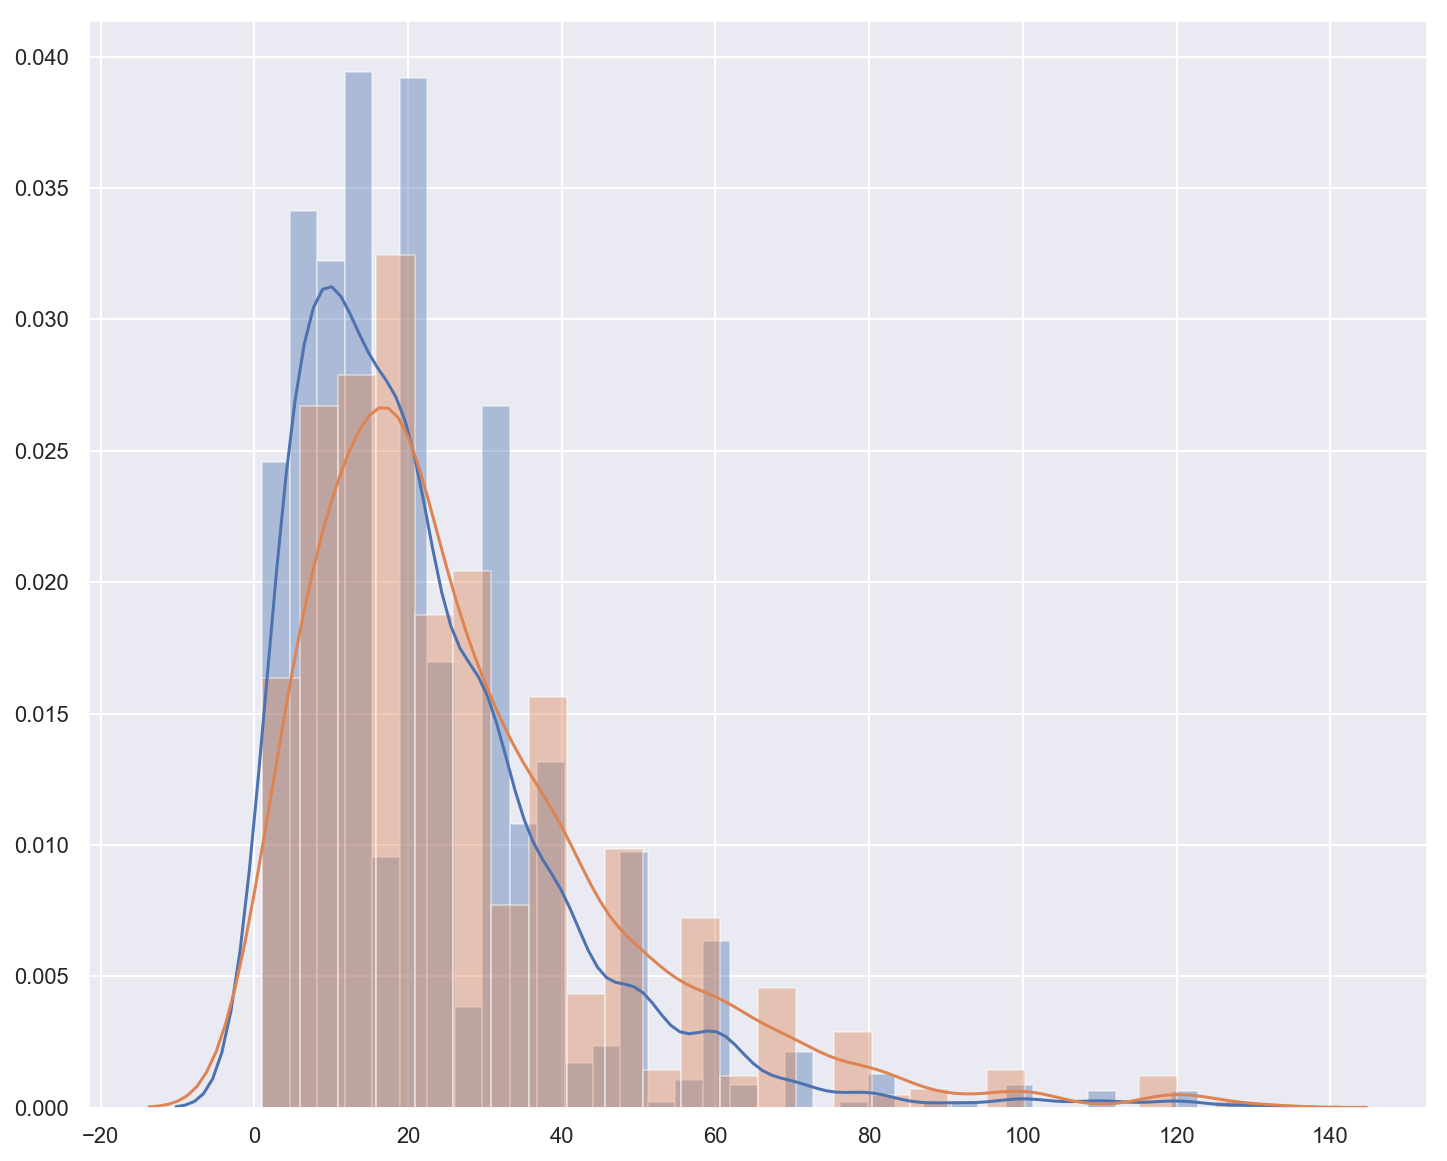

In [404]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(no_disc)
sns.distplot(disc)

In [406]:
#print(disc.mean() - no_disc.mean()) #5.3945

In [407]:
# to get t statistic and pvalue, use code from "2 sample ttest" lab in section 20